In [27]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib as plt
import numpy as np

In [28]:
iris_data = pd.read_csv('Iris.csv',header=0,delimiter=',',encoding='utf-8')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [29]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [30]:
iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [32]:
data_feature = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
data_feature

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
pca_instance = PCA(n_components = 2)
features_reduced = pca_instance.fit_transform(data_feature)
print(f'features_reduce shape: {features_reduced.shape}, first few entries: {features_reduced[:5]}')

features_reduce shape: (150, 2), first few entries: [[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]]


<Axes: >

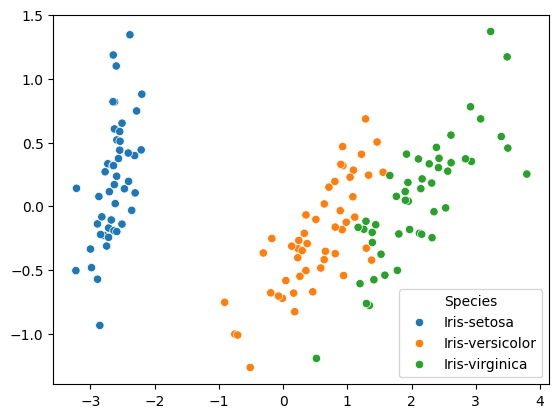

In [34]:
sns.scatterplot(x=features_reduced[:,0], y=features_reduced[:,1], hue= iris_data['Species'])

In [35]:
data_numpy=data_feature.to_numpy()
data_numpy.shape

(150, 4)

In [36]:
k = 3
rng = np.random.default_rng()
#create random cluster center
cluster_centers = np.zeros((k, data_numpy.shape[1]))
for i in range(k):
    random_index = int(150 * rng.random())
    cluster_centers[i] = data_numpy[random_index]
print('Center:')
print(cluster_centers)

Center:
[[7.1 3.  5.9 2.1]
 [5.7 2.8 4.1 1.3]
 [5.1 3.5 1.4 0.3]]


In [37]:
cluster_centers_reduced = pca_instance.transform(cluster_centers)
print('Center recuded by PCA')
print(cluster_centers_reduced)

Center recuded by PCA
[[ 2.61648461  0.34193529]
 [ 0.29780791 -0.34701652]
 [-2.64832273  0.31913667]]


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


<Axes: >

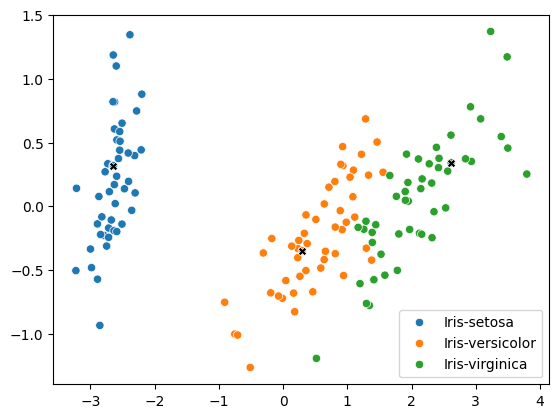

In [38]:
sns.scatterplot(x=features_reduced[:,0], y=features_reduced[:,1], hue= iris_data['Species'])
sns.scatterplot(x=cluster_centers_reduced[:,0], y=cluster_centers_reduced[:,1], color= 'black', marker='X')

In [40]:
cluster_per_datapoint = np.zeros(data_numpy.shape[0])
for i in range (data_numpy.shape[0]):
    distances = [np.linalg.norm(data_numpy[i] - center) for center in cluster_centers]
    nearest_center= np.argmin(distances)
    cluster_per_datapoint[i] = nearest_center
cluster_per_datapoint

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

<Axes: >

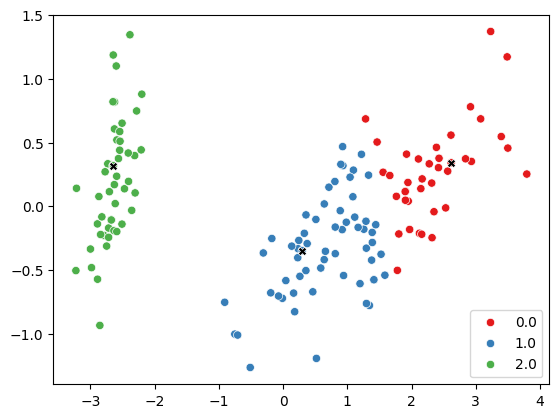

In [43]:
sns.scatterplot(x=features_reduced[:,0], y=features_reduced[:,1], hue= cluster_per_datapoint, palette='Set1')
sns.scatterplot(x=cluster_centers_reduced[:,0], y=cluster_centers_reduced[:,1], color= 'black', marker='X')

In [44]:
cluster_per_datapoint == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,

In [45]:
data_numpy[cluster_per_datapoint == 1]

array([[6.4, 3.2, 4.5, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [6.3, 2

In [46]:
old_cluster_centers = cluster_centers.copy()
cluster_centers = np.zeros((k, data_numpy.shape[1]))
for i in range(k):
    cluster_centers[i] = np.average(data_numpy[cluster_per_datapoint == i], axis=0)
print(cluster_centers)

[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.418      1.464      0.244     ]]


In [47]:
new_cluster_centers_reduced = pca_instance.transform(cluster_centers)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


<Axes: >

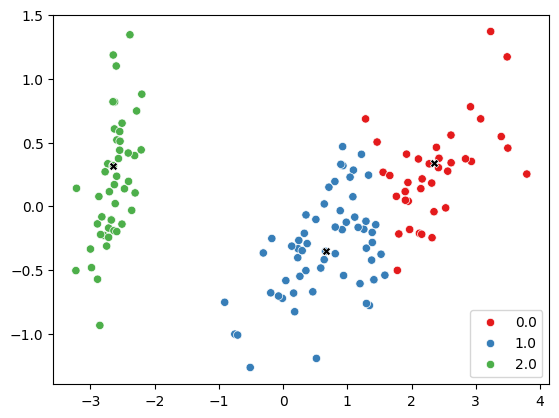

In [48]:
sns.scatterplot(x=features_reduced[:,0], y=features_reduced[:,1], hue= cluster_per_datapoint, palette='Set1')
sns.scatterplot(x=new_cluster_centers_reduced[:,0], y=cluster_centers_reduced[:,1], color= 'black', marker='X')